In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# import all classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import brier_score_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Debernardi et al 2020 data.csv')
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [3]:
df.shape

(590, 14)

In [4]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [5]:

cols = df.columns.to_list()
df.diagnosis = df.diagnosis == 3
df.sex = df.sex.map({'M': 1, 'F': 0})
df = df[['creatinine',
         'plasma_CA19_9',
         'age',
         'sex',
         'LYVE1',
         'REG1B',
         'TFF1',
         'diagnosis']].copy()
## Turn multiclass problem into binary classification problem, it gives best results (tested but not shown in the final version) ##
df.head(20)

,creatinine,plasma_CA19_9,age,sex,LYVE1,REG1B,TFF1,diagnosis
0,1.83222,11.7,33,0,0.893219,52.94884,654.282174,False
1,0.97266,NaN,81,0,2.037585,94.46703,209.488250,False
2,0.78039,7.0,51,1,0.145589,102.36600,461.141000,False
3,0.70122,8.0,61,1,0.002805,60.57900,142.950000,False
4,0.21489,9.0,62,1,0.000860,65.54000,41.088000,False
5,0.84825,NaN,53,1,0.003393,62.12600,59.793000,False
6,0.62205,NaN,70,1,0.174381,152.27700,117.516000,False
7,0.89349,11.0,58,0,0.003574,3.73000,40.294000,False
8,0.48633,NaN,59,0,0.001945,7.02100,26.782000,False
9,0.61074,24.0,56,0,0.278778,83.92800,19.185000,False


In [6]:
df.isnull().sum()

creatinine         0
plasma_CA19_9    240
age                0
sex                0
LYVE1              0
REG1B              0
TFF1               0
diagnosis          0
dtype: int64

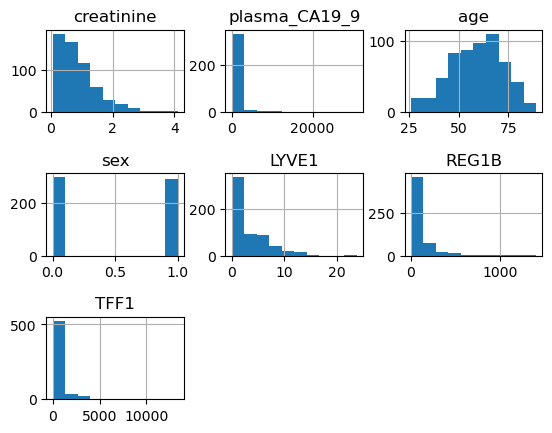

In [7]:
df.hist()
plt.subplots_adjust(hspace=.75)

In [8]:
# diagonis class distribution

df.diagnosis.value_counts()

False    391
True     199
Name: diagnosis, dtype: int64

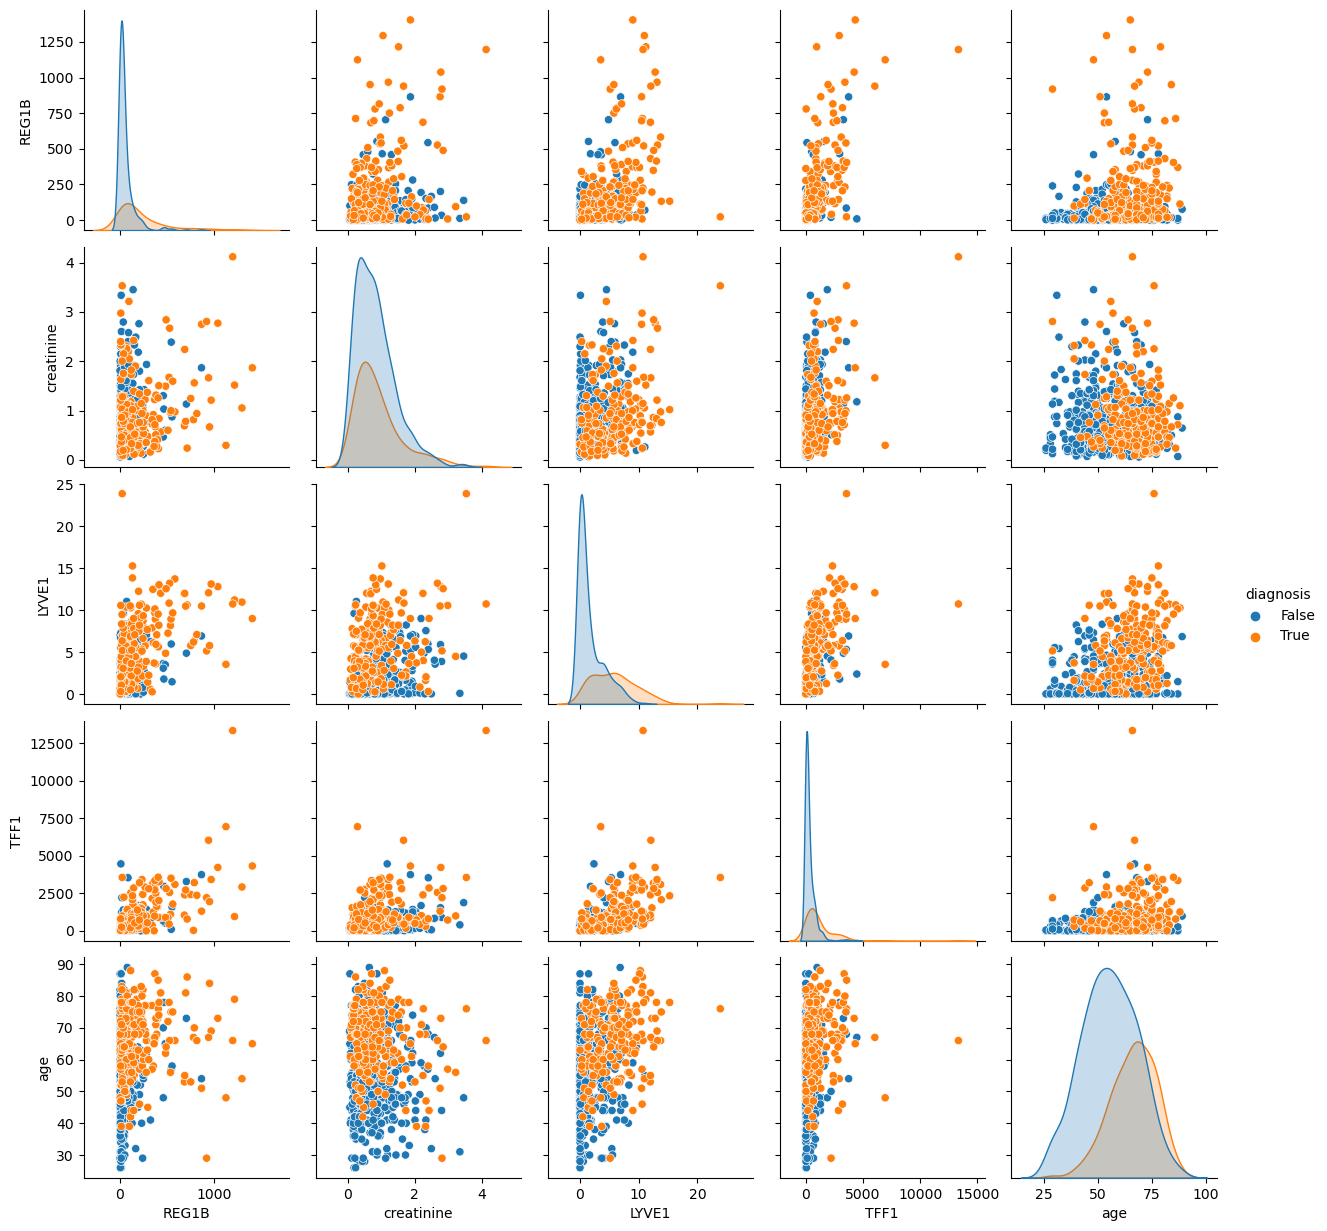

In [9]:
sns.pairplot(data=df, vars=['REG1B',  'creatinine',
             'LYVE1', 'TFF1', 'age'], hue='diagnosis', diag_kind='kde')

<Axes: xlabel='diagnosis', ylabel='TFF1'>

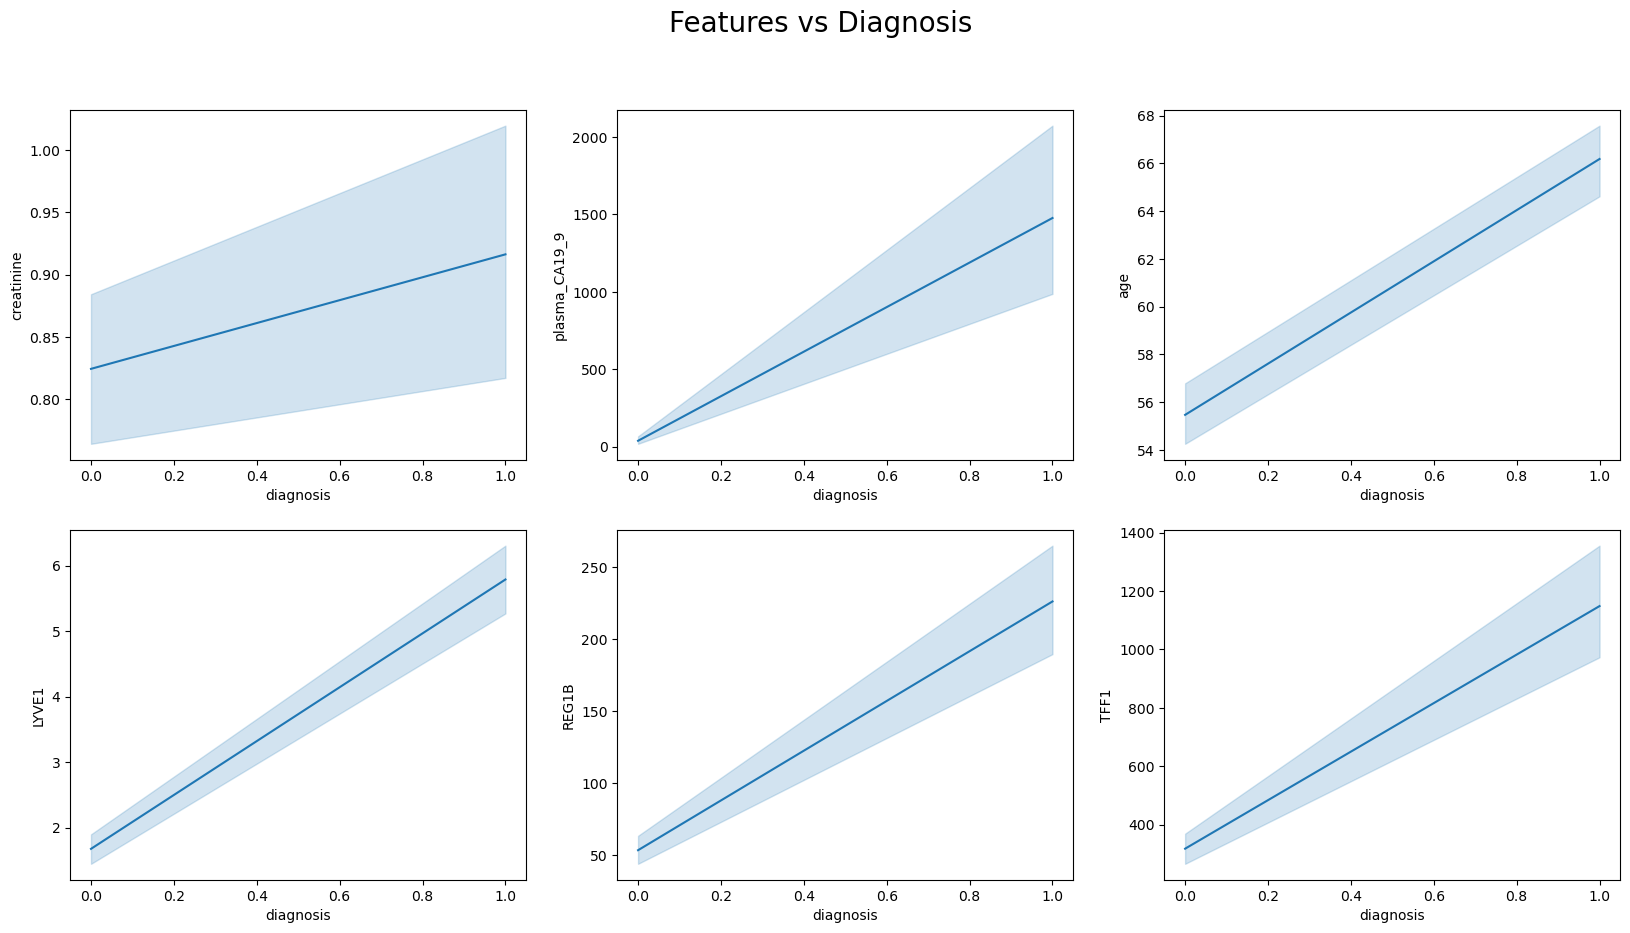

In [10]:
# plot line graph for each feature vs diagnosis

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Features vs Diagnosis', fontsize=20)
sns.lineplot(ax=axes[0, 0], x='diagnosis', y='creatinine', data=df)
sns.lineplot(ax=axes[0, 1], x='diagnosis', y='plasma_CA19_9', data=df)
sns.lineplot(ax=axes[0, 2], x='diagnosis', y='age', data=df)

sns.lineplot(ax=axes[1, 0], x='diagnosis', y='LYVE1', data=df)
sns.lineplot(ax=axes[1, 1], x='diagnosis', y='REG1B', data=df)
sns.lineplot(ax=axes[1, 2], x='diagnosis', y='TFF1', data=df)


<Axes: xlabel='diagnosis', ylabel='count'>

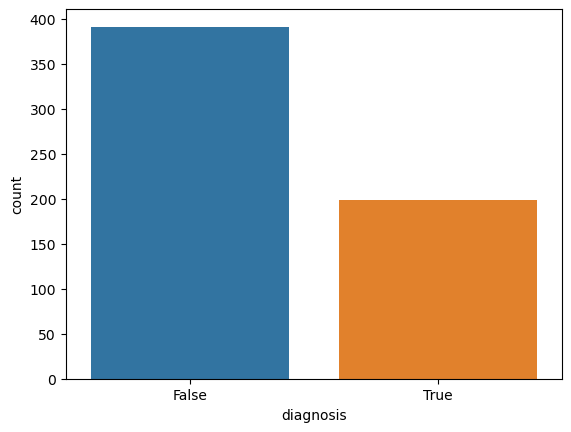

In [11]:
#check imbalance
sns.countplot(x='diagnosis', data=df)

<Axes: >

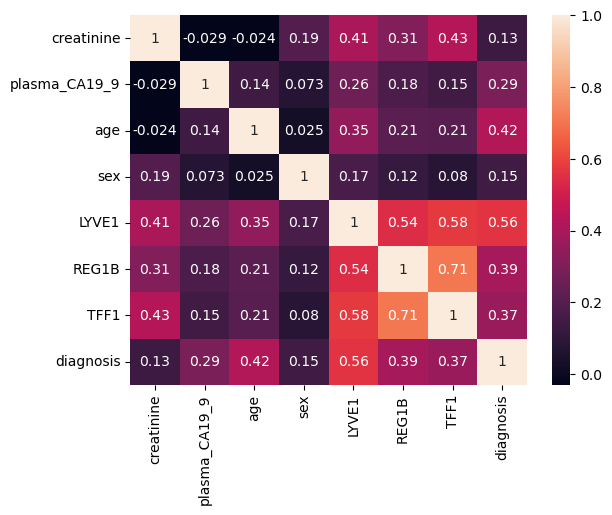

In [12]:
corr = df.dropna().corr()
sns.heatmap(corr, annot=True)

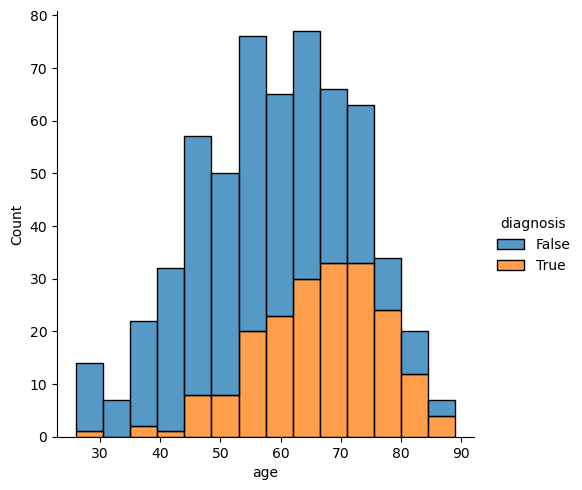

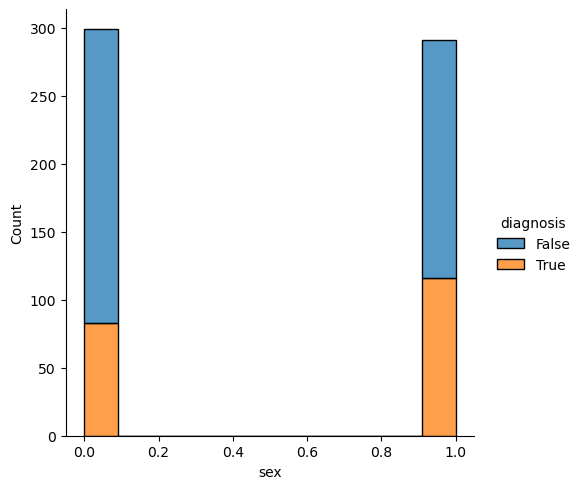

In [13]:
for feature in ['age', 'sex']:
    sns.displot(df, x=feature, hue="diagnosis", multiple='stack')

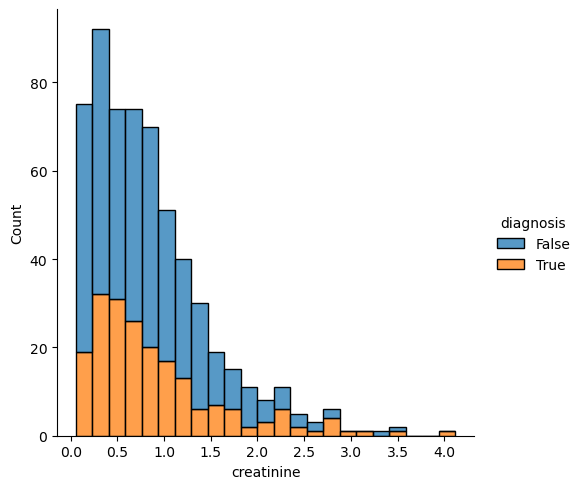

In [14]:
# creatinine vs diagnosis

sns.displot(df, x='creatinine', hue="diagnosis", multiple='stack')

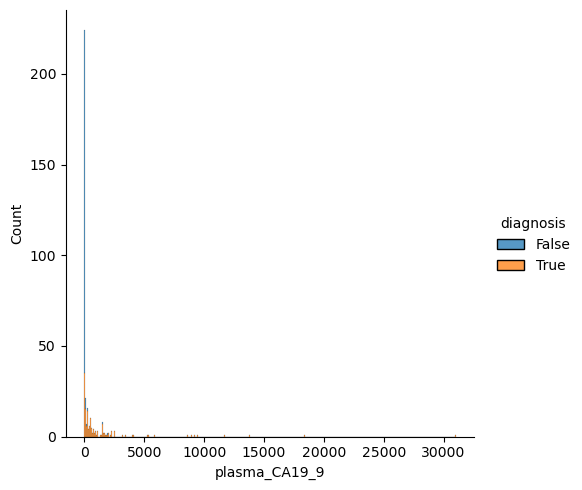

In [15]:
# plasma_CA19_9 vs diagnosis

sns.displot(df, x='plasma_CA19_9', hue="diagnosis", multiple='stack')

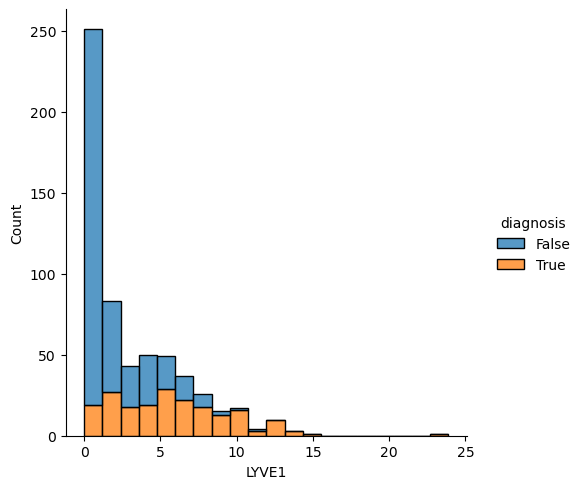

In [16]:
# LYVE1 vs diagnosis

sns.displot(df, x='LYVE1', hue="diagnosis", multiple='stack')

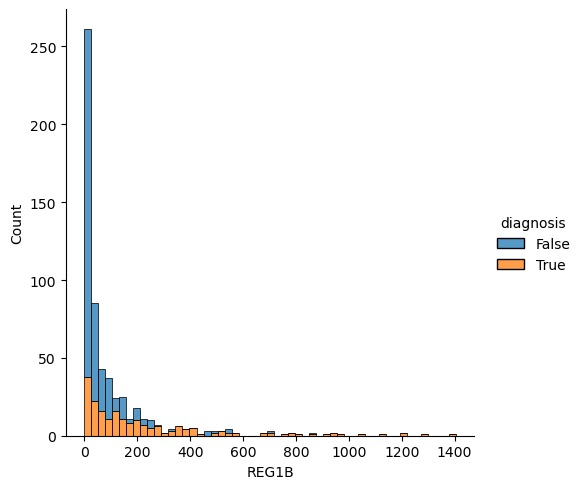

In [17]:
# REG1B vs diagnosis

sns.displot(df, x='REG1B', hue="diagnosis", multiple='stack')

<Axes: xlabel='TFF1', ylabel='Density'>

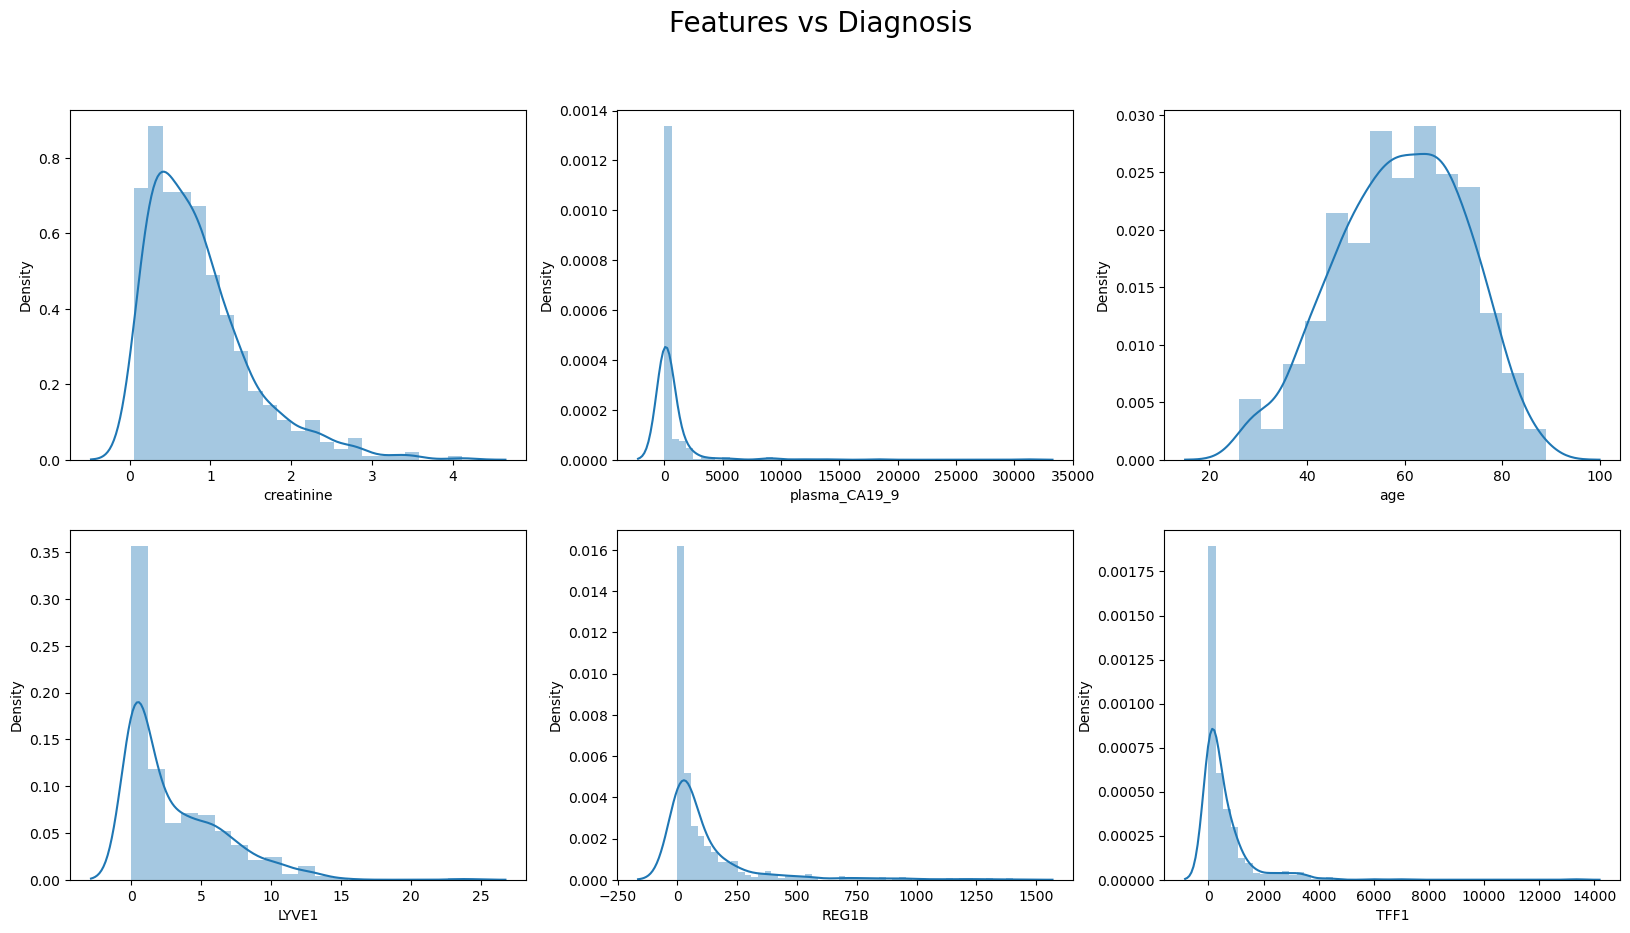

In [18]:
# skewness graph for each feature

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Features vs Diagnosis', fontsize=20)
sns.distplot(df['creatinine'], ax=axes[0, 0])
sns.distplot(df['plasma_CA19_9'], ax=axes[0, 1])
sns.distplot(df['age'], ax=axes[0, 2])

sns.distplot(df['LYVE1'], ax=axes[1, 0])
sns.distplot(df['REG1B'], ax=axes[1, 1])
sns.distplot(df['TFF1'], ax=axes[1, 2])


<Axes: xlabel='diagnosis', ylabel='TFF1'>

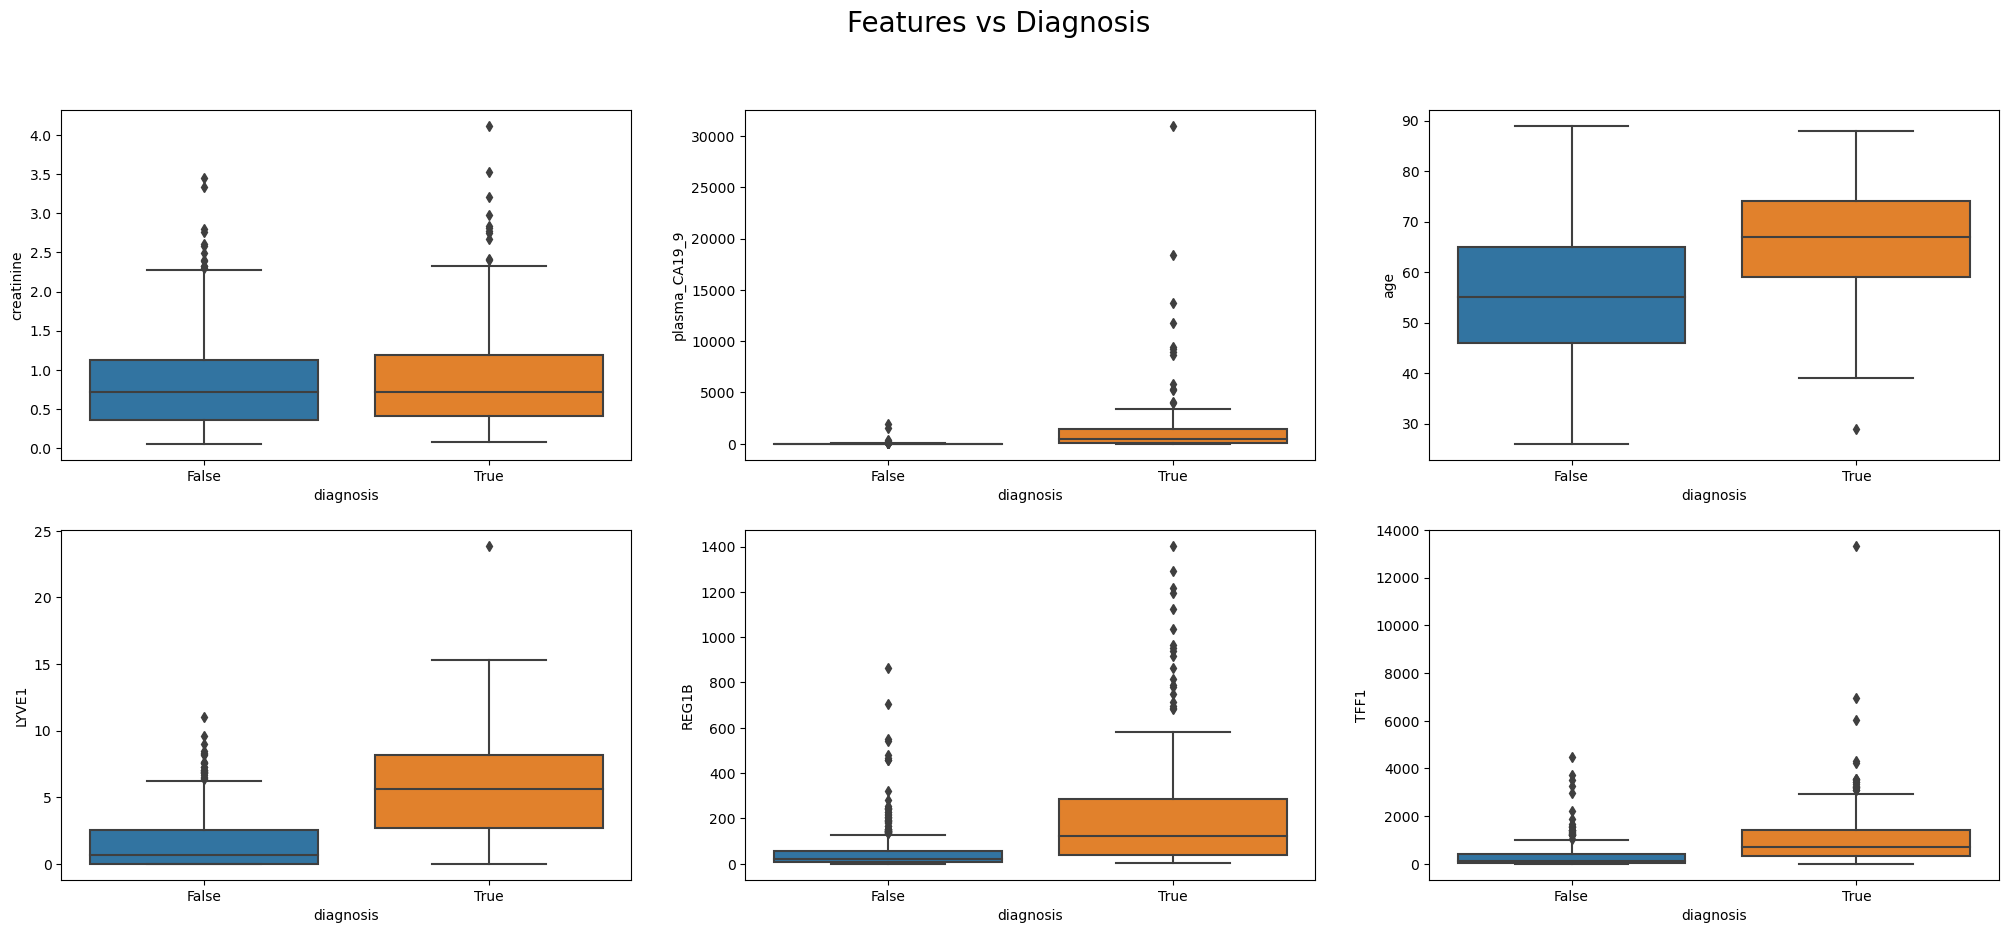

In [19]:

# boxplot for each feature

fig, axes = plt.subplots(2, 3, figsize=(25, 10))
fig.suptitle('Features vs Diagnosis', fontsize=20)
sns.boxplot(ax=axes[0, 0], x='diagnosis', y='creatinine', data=df)
sns.boxplot(ax=axes[0, 1], x='diagnosis', y='plasma_CA19_9', data=df)
sns.boxplot(ax=axes[0, 2], x='diagnosis', y='age', data=df)

sns.boxplot(ax=axes[1, 0], x='diagnosis', y='LYVE1', data=df)
sns.boxplot(ax=axes[1, 1], x='diagnosis', y='REG1B', data=df)
sns.boxplot(ax=axes[1, 2], x='diagnosis', y='TFF1', data=df)


In [20]:
# # impute the missing values with the mean of the column
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(df)
# df = pd.DataFrame(imputer.transform(df), columns=df.columns)

from sklearn.utils import shuffle

In [21]:
df.isnull().sum()

creatinine         0
plasma_CA19_9    240
age                0
sex                0
LYVE1              0
REG1B              0
TFF1               0
diagnosis          0
dtype: int64

In [22]:
# median imputation

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

In [23]:
df = shuffle(df, random_state=42).reset_index(drop=True)

In [24]:

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [25]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)

In [26]:
model=LGBMClassifier(num_leaves=15, learning_rate=0.01, n_estimators=400, max_depth=3,verbose=-100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the LGBM Classifier without bagging and boosting is',metrics.accuracy_score(prediction,y_test))
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(roc_auc_score(y_test, prediction))
print(brier_score_loss(y_test, prediction))
print(metrics.precision_score(y_test, prediction))
print(metrics.recall_score(y_test, prediction))
print(metrics.f1_score(y_test, prediction))



The accuracy of the LGBM Classifier without bagging and boosting is 0.8764044943820225
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        59
         1.0       0.88      0.73      0.80        30

    accuracy                           0.88        89
   macro avg       0.88      0.84      0.86        89
weighted avg       0.88      0.88      0.87        89

[[56  3]
 [ 8 22]]
0.8412429378531074
0.12359550561797752
0.88
0.7333333333333333
0.8


In [27]:
# Calculate and print log loss
from sklearn.metrics import log_loss


logloss = log_loss(y_test, model.predict_proba(X_test))
print('Log Loss:', logloss)

Log Loss: 0.28234901044588645


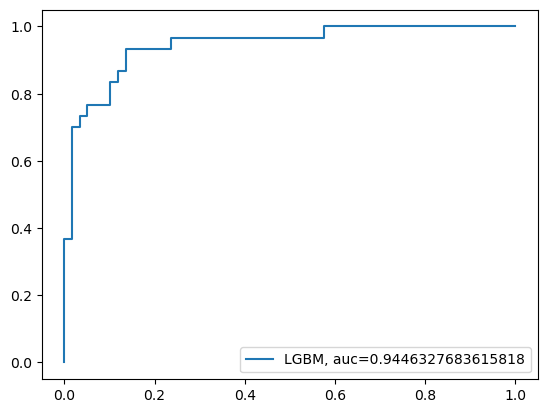

NameError: name 'precision_recall_curve' is not defined

In [28]:
# auc-roc curve
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="LGBM, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc=metrics.auc(recall, precision)
plt.plot(recall, precision, marker='.', label=f'LGBM (AUC={pr_auc:.2f}' )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# Bagging and Boosting

# LGBM

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


# Base classifier
base_classifier = LGBMClassifier(num_leaves=15, learning_rate=0.01, n_estimators=400, max_depth=3,verbose=-100)

# Bagging (Bootstrap Aggregating) using BaggingClassifier
bagging_model = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)


In [ ]:

# AdaBoost (Adaptive Boosting) using AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=100,  random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)


In [ ]:
print("LGBM Classifier: ")
# Evaluate the models
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

print(f'Accuracy with Bagging: {accuracy_bagging:.4f}')
print(f'Accuracy with AdaBoost: {accuracy_adaboost:.4f}')
print(classification_report(y_test, y_pred_bagging))

LGBM Classifier: 
Accuracy with Bagging: 0.9101
Accuracy with AdaBoost: 0.8764
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93        59
         1.0       0.89      0.83      0.86        30

    accuracy                           0.91        89
   macro avg       0.91      0.89      0.90        89
weighted avg       0.91      0.91      0.91        89



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# ... (previous code)

# ROC-AUC curve for Bagging
y_prob_bagging = bagging_model.predict_proba(X_test)[:, 1]
fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_prob_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# ROC-AUC curve for AdaBoost
y_prob_adaboost = adaboost_model.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)


In [ ]:

# Precision-Recall curve for Bagging
precision_bagging, recall_bagging, _ = precision_recall_curve(y_test, y_prob_bagging)
pr_auc_bagging = auc(recall_bagging, precision_bagging)

# Precision-Recall curve for AdaBoost
precision_adaboost, recall_adaboost, _ = precision_recall_curve(y_test, y_prob_adaboost)
pr_auc_adaboost = auc(recall_adaboost, precision_adaboost)


In [ ]:

# Print ROC-AUC scores
print(f'ROC-AUC for Bagging: {roc_auc_bagging:.4f}')
print(f'ROC-AUC for AdaBoost: {roc_auc_adaboost:.4f}')

# Print Precision-Recall AUC scores
print(f'Precision-Recall AUC for Bagging: {pr_auc_bagging:.4f}')
print(f'Precision-Recall AUC for AdaBoost: {pr_auc_adaboost:.4f}')


ROC-AUC for Bagging: 0.9548
ROC-AUC for AdaBoost: 0.9554
Precision-Recall AUC for Bagging: 0.9181
Precision-Recall AUC for AdaBoost: 0.9200


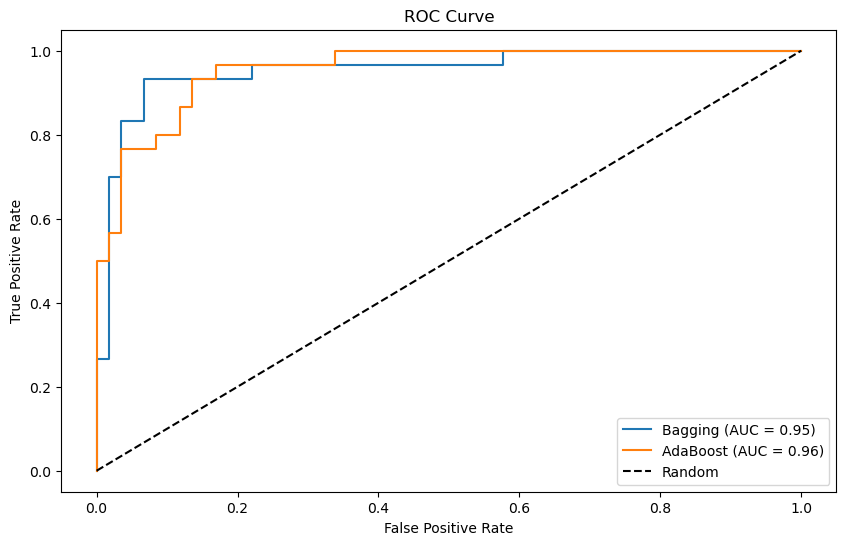

In [ ]:

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_bagging, tpr_bagging, label=f'Bagging (AUC = {roc_auc_bagging:.2f})')
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {roc_auc_adaboost:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


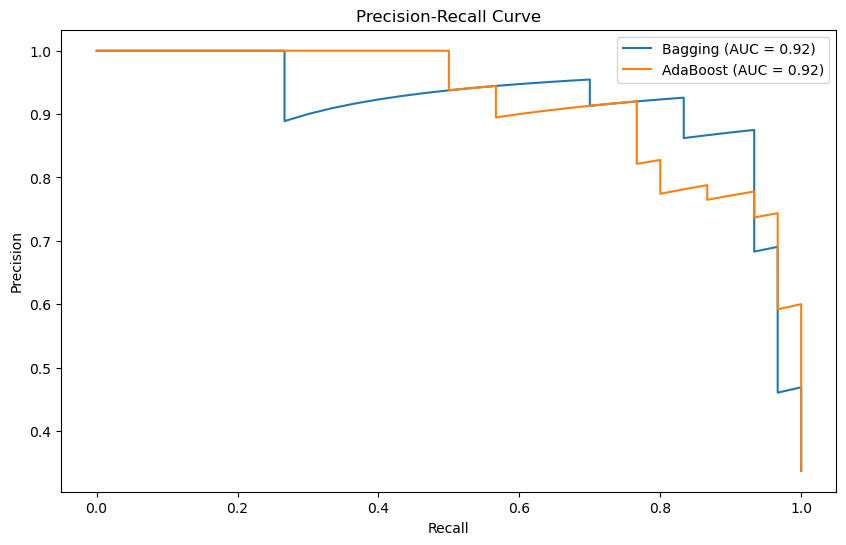

In [ ]:

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_bagging, precision_bagging, label=f'Bagging (AUC = {pr_auc_bagging:.2f})')
plt.plot(recall_adaboost, precision_adaboost, label=f'AdaBoost (AUC = {pr_auc_adaboost:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


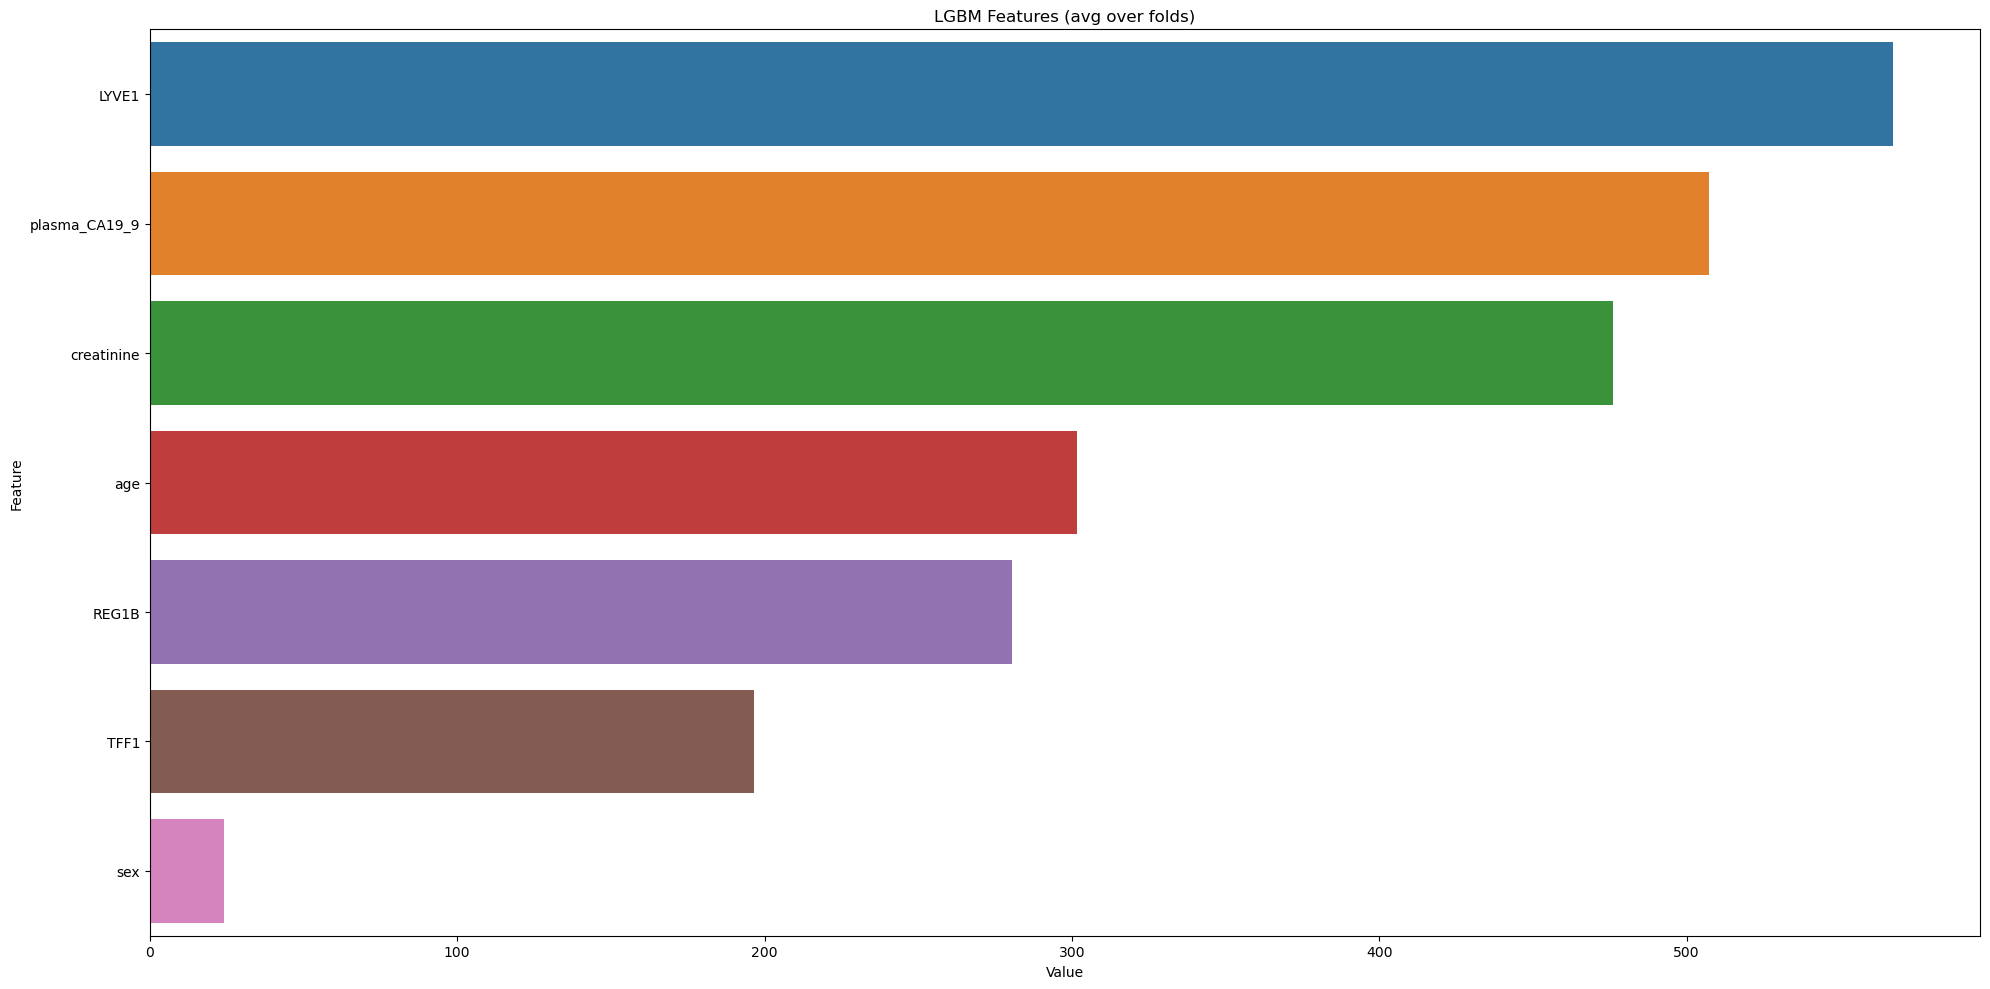

In [ ]:


feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_model.estimators_
], axis=0)

feature_imp = pd.DataFrame(sorted(zip(feature_importances, X.columns)), columns=['Value', 'Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features (avg over folds)')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your predicted probabilities (y_prob_bagging, y_prob_adaboost) and true labels (y_test)

# Calculate cross-entropy loss
loss_bagging = log_loss(y_test, y_prob_bagging)
loss_adaboost = log_loss(y_test, y_prob_adaboost)


# Print the information loss
print(f'Information Loss (Cross-Entropy) for Bagging: {loss_bagging:.4f}')
print(f'Information Loss (Cross-Entropy) for AdaBoost: {loss_adaboost:.4f}')


Information Loss (Cross-Entropy) for Bagging: 0.2637
Information Loss (Cross-Entropy) for AdaBoost: 0.3748


In [ ]:
# Comparison of LGBM , LGBM with bagging and LGBM with boosting

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

#  predicted probabilities distribution 

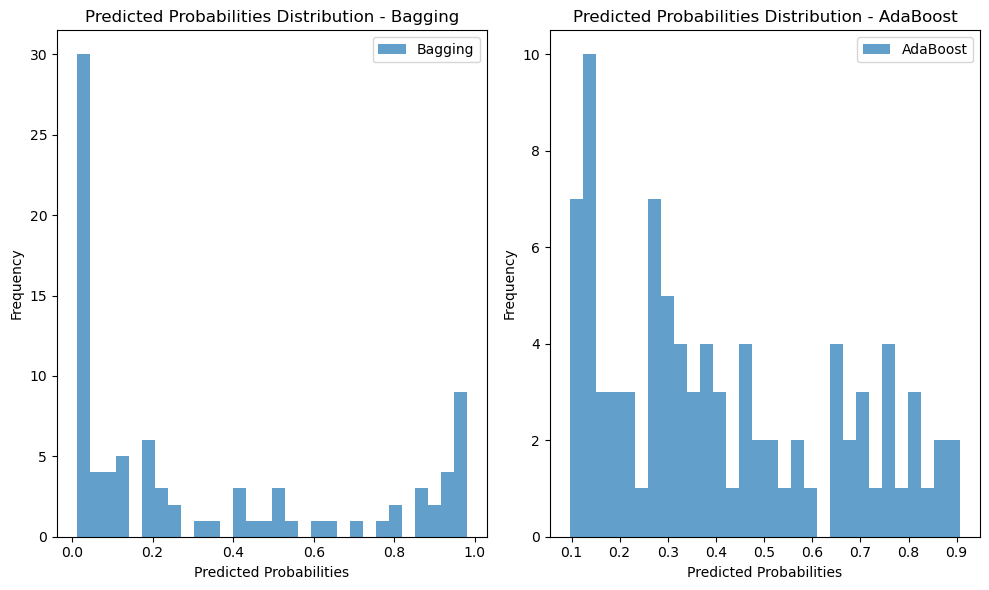

In [151]:

# Plot the predicted probabilities distribution
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(y_prob_bagging, bins=30, label='Bagging', alpha=0.7)
plt.title('Predicted Probabilities Distribution - Bagging')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_prob_adaboost, bins=30, label='AdaBoost', alpha=0.7)
plt.title('Predicted Probabilities Distribution - AdaBoost')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [133]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Random Forests without Bagging and Boosting is',metrics.accuracy_score(prediction,y_test))
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(roc_auc_score(y_test, prediction))
print(brier_score_loss(y_test, prediction))
print(metrics.precision_score(y_test, prediction))
print(metrics.recall_score(y_test, prediction))
print(metrics.f1_score(y_test, prediction))



The accuracy of the Random Forests without Bagging and Boosting is 0.898876404494382
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92        59
         1.0       0.86      0.83      0.85        30

    accuracy                           0.90        89
   macro avg       0.89      0.88      0.89        89
weighted avg       0.90      0.90      0.90        89

[[55  4]
 [ 5 25]]
0.8827683615819208
0.10112359550561797
0.8620689655172413
0.8333333333333334
0.847457627118644


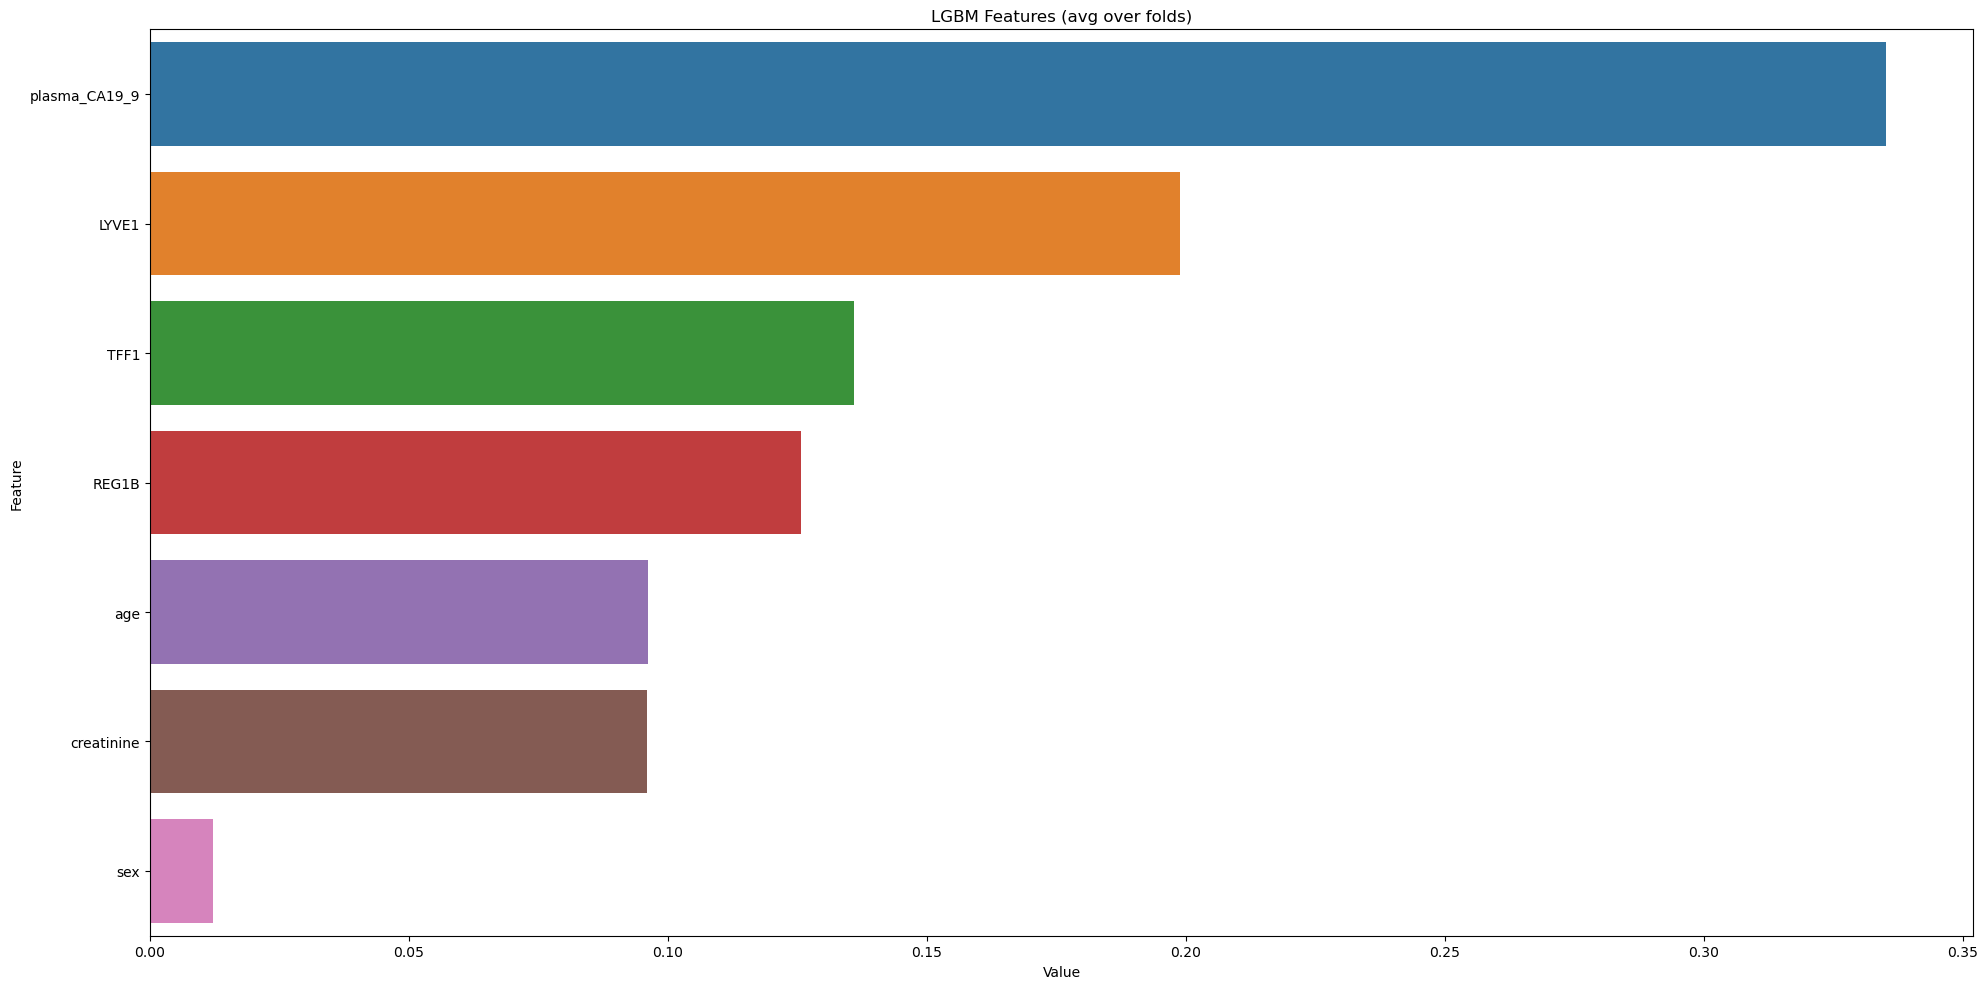

In [134]:

# feature importance

feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns)), columns=['Value', 'Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# Calculate and print log loss
from sklearn.metrics import log_loss


logloss = log_loss(y_test, model.predict_proba(X_test))
print('Log Loss:', logloss)

# ROC curve
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Random Forest, auc="+str(auc))
plt.legend(loc=4)
plt.show()



# Random Forest

In [152]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


# Base classifier
base_classifier = RandomForestClassifier()

# Bagging (Bootstrap Aggregating) using BaggingClassifier
bagging_model = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)


In [153]:

# AdaBoost (Adaptive Boosting) using AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=100,  random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)


In [154]:

# Evaluate the models
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

print(f'Accuracy with Bagging: {accuracy_bagging:.4f}')
print(f'Accuracy with AdaBoost: {accuracy_adaboost:.4f}')

Accuracy with Bagging: 0.9213
Accuracy with AdaBoost: 0.9101


In [155]:
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        59
         1.0       0.93      0.83      0.88        30

    accuracy                           0.92        89
   macro avg       0.92      0.90      0.91        89
weighted avg       0.92      0.92      0.92        89



ROC-AUC for Bagging: 0.9605
ROC-AUC for AdaBoost: 0.9630
Precision-Recall AUC for Bagging: 0.9013
Precision-Recall AUC for AdaBoost: 0.8956


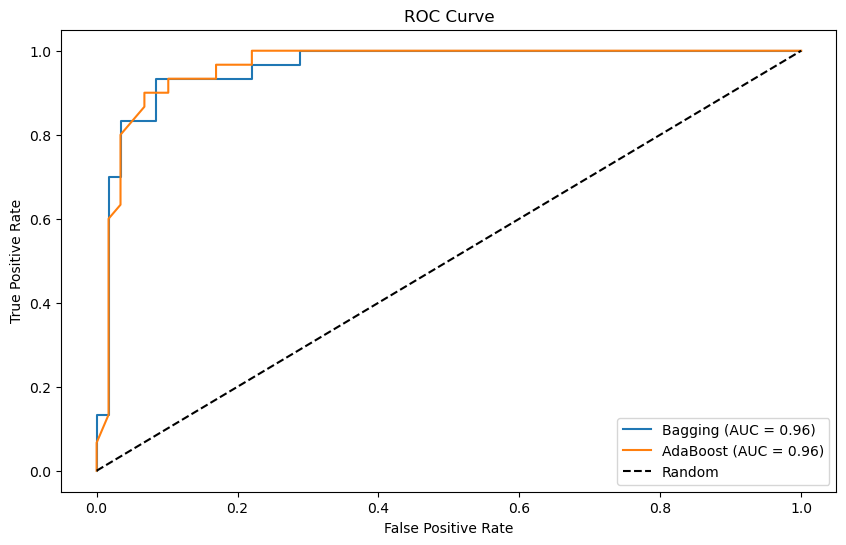

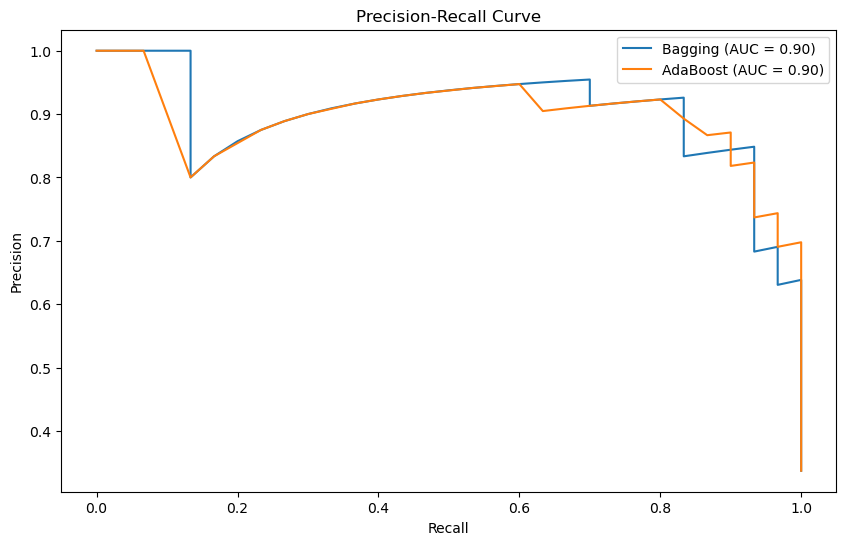

0.8997175141242939

In [156]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# ... (previous code)

# ROC-AUC curve for Bagging
y_prob_bagging = bagging_model.predict_proba(X_test)[:, 1]
fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_prob_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# ROC-AUC curve for AdaBoost
y_prob_adaboost = adaboost_model.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

# Precision-Recall curve for Bagging
precision_bagging, recall_bagging, _ = precision_recall_curve(y_test, y_prob_bagging)
pr_auc_bagging = auc(recall_bagging, precision_bagging)

# Precision-Recall curve for AdaBoost
precision_adaboost, recall_adaboost, _ = precision_recall_curve(y_test, y_prob_adaboost)
pr_auc_adaboost = auc(recall_adaboost, precision_adaboost)

# Print ROC-AUC scores
print(f'ROC-AUC for Bagging: {roc_auc_bagging:.4f}')
print(f'ROC-AUC for AdaBoost: {roc_auc_adaboost:.4f}')

# Print Precision-Recall AUC scores
print(f'Precision-Recall AUC for Bagging: {pr_auc_bagging:.4f}')
print(f'Precision-Recall AUC for AdaBoost: {pr_auc_adaboost:.4f}')

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_bagging, tpr_bagging, label=f'Bagging (AUC = {roc_auc_bagging:.2f})')
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {roc_auc_adaboost:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_bagging, precision_bagging, label=f'Bagging (AUC = {pr_auc_bagging:.2f})')
plt.plot(recall_adaboost, precision_adaboost, label=f'AdaBoost (AUC = {pr_auc_adaboost:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# roc-auc score
roc_auc_score(y_test, y_pred_bagging)


In [157]:
roc_auc_score(y_test, y_pred_bagging)

0.8997175141242939

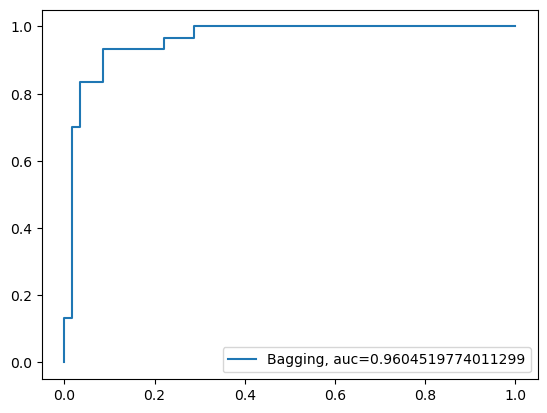

In [158]:
#plot roc curve

y_pred_proba = bagging_model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Bagging, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [159]:
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your predicted probabilities (y_prob_bagging, y_prob_adaboost) and true labels (y_test)

# Calculate cross-entropy loss
loss_bagging = log_loss(y_test, y_prob_bagging)
loss_adaboost = log_loss(y_test, y_prob_adaboost)


# Print the information loss
print(f'Information Loss (Cross-Entropy) for Bagging: {loss_bagging:.4f}')
print(f'Information Loss (Cross-Entropy) for AdaBoost: {loss_adaboost:.4f}')


Information Loss (Cross-Entropy) for Bagging: 0.2596
Information Loss (Cross-Entropy) for AdaBoost: 0.2491
